# Heart Attack Prediction 

**Information about Data**

**Columns is ::**
1. -Age is the age of candidate.
1. -Sex has numeric values. 1 is male and 0 is female.
1. -(cp)Chest Pain pain has values between 0-3. 
 The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
   — Value 1: typical angina
   — Value 2: atypical angina
   — Value 3: non-anginal pain
1. -(trestbps)Resting blood pressure is normal pressure with no exercise.
1. -(chol)Cholesterol means the blockage for blood supply in the blood vessels.
1. -(fbs)fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
 blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.
1. -(restecg)Rest ECG results means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening.
1. -(thalach)The Maximum Heart Rate achieved.
1. -(exang): exercise induced angina (1 = yes; 0 = no)
 is chest pain while exercising or doing any physical activity.
1. -(oldpeak)ST Depression is the difference between value of ECG at rest and after exercise.
 
1. -(slope): the slope of the peak exercise ST segment
     — Value 1: upsloping
     — Value 2: flat
     — Value 3: downsloping
1. (ca): The number of major blood vessels(0-3)  supplying blood to heart blocked.
1. -(thal):The Types of thalassemia
    (3 = normal;
    6 = fixed defect; 
    7 = reversable defect)
1. -(target) (predicted attribute): diagnosis of heart disease (angiographic disease status)
      — Value 0: < 50% diameter narrowing
      — Value 1: > 50% diameter narrowing

**Heart attack prediction where 1 denotes Heart attack occured and 0 where it din't take occur.


# Important libraries

In [1]:
#For uploading and accessing the data
import numpy as np
import pandas as pd
#For visualizations
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Read Data

In [2]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv' , sep=',' , encoding='utf8')

In [3]:
#show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.shape

(303, 14)

* -Data Containing of 303 row and 14 columns(features)
* -No found Null
* -all data is integer except oldpeak is float

In [5]:
#show first 5 row from data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Renaming the column headers for better understanding of visualizations.**

In [7]:
data.rename(columns = {'age':'Age','sex':'Gender','cp':'Chest_pain' ,'trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'} , inplace = True)

In [8]:
#show heading of columns
data.head()

,Age,Gender,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Gender                   303 non-null    int64  
 2   Chest_pain               303 non-null    int64  
 3   Resting_blood_pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_blood_sugar      303 non-null    int64  
 6   ECG_results              303 non-null    int64  
 7   Maximum_heart_rate       303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Major_vessels            303 non-null    int64  
 12  Thalassemia_types        303 non-null    int64  
 13  Heart_attack             303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [10]:
#show sum of null data
data.isnull().sum()
#also no found null

Age                        0
Gender                     0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

In [11]:
#show all statistics
data.describe(include='all')

,Age,Gender,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#replace number to object to make reading is easy
#data['Gender'].replace({1:'Male' , 0:'Female'},inplace = True)

In [13]:
#replace number to object to make reading is easy
#data['Heart_attack'].replace({1:'Heart_attack-Yes' , 0:'Heart_attack-No'} ,inplace = True)

In [14]:
data.head()

,Age,Gender,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
data.tail()

,Age,Gender,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [16]:
#GAH refer to gender , age and has Heart_attack 
#count of member has Heart_attack according his gender and age
GAH = data.groupby(['Gender','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
GAH.head(20).style.background_gradient(cmap='Purples')

,Gender,Age,Heart_attack
59,1,58,13
58,1,57,13
60,1,59,13
53,1,52,12
55,1,54,11
45,1,44,9
52,1,51,8
57,1,56,8
61,1,60,7
65,1,64,7


* 1:Male
* 0:Female
* top 20 count of heart attack, males have witnessed more heart attacks for their ages.**

In [17]:
#GcH refer to gender , Chest_pain and has Heart_attack 
#count of member has Heart_attack according his Chest_pain and Gender
GcH = data.groupby(['Gender' , 'Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GcH.head(20).style.background_gradient(cmap='Blues')

,Gender,Chest_pain,Heart_attack
4,1,0,104
6,1,2,52
0,0,0,39
2,0,2,35
5,1,1,32
7,1,3,19
1,0,1,18
3,0,3,4


* The higher the number, the lesser are the odds of heart attack
* shows that large number of Male has Heart_Attack with Chest_pain less
* just 19 Man has Heart_Attack with Chest_pain higher
* for women 4 women has Heart_Attack with Chest_pain higher
* 39 women has Heart_Attack with Chest_pain less

In [18]:
data.columns

Index(['Age', 'Gender', 'Chest_pain', 'Resting_blood_pressure', 'Cholesterol',
       'Fasting_blood_sugar', 'ECG_results', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack'],
      dtype='object')

In [19]:
data.Chest_pain

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: Chest_pain, Length: 303, dtype: int64

In [20]:
#GRH refer to gender , Resting_blood_pressure and has Heart_attack 
#count of member has Heart_attack according his Resting_blood_pressure and Gender
GRH = data.groupby(['Gender' , 'Resting_blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GRH.head(8).style.background_gradient(cmap='coolwarm')

,Gender,Resting_blood_pressure,Heart_attack
46,1,120,27
54,1,130,24
60,1,140,22
40,1,110,16
15,0,130,12
50,1,125,11
21,0,140,10
66,1,150,10


count of Male 16 has Resting_blood_pressure 110 but count of women 12 has Resting_blood_pressure 130

In [21]:
#GCH refer to gender , Cholesterol and has Heart_attack 
#count of member has Heart_attack according his Cholesterol and Gender
GCH = data.groupby(['Gender' , 'Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GCH.head(10).style.background_gradient(cmap='OrRd')

,Gender,Cholesterol,Heart_attack
115,1,212,5
109,1,204,4
135,1,234,4
134,1,233,4
172,1,282,4
150,1,254,4
48,0,269,4
144,1,246,3
143,1,245,3
141,1,243,3


* count of Male with high Cholesterol less (212 -5)
* for female Cholesterol was high and count of persone has Heart_attack is smaller

In [22]:
#GFH refer to gender , Fasting_blood_sugar and has Heart_attack 
#count of member has Heart_attack according his Fasting_blood_sugar and Gender
GFH = data.groupby(['Gender' , 'Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GFH.style.background_gradient(cmap='YlGn')

,Gender,Fasting_blood_sugar,Heart_attack
2,1,0,174
0,0,0,84
3,1,1,33
1,0,1,12


When Fasting_blood_sugar was False --Heart_attack was highe for Male also with women

In [23]:
data.Fasting_blood_sugar.shape

(303,)

In [24]:
#GECH refer to gender , ECG_results and has Heart_attack 
#count of member has Heart_attack according his ECG_results and Gender
GECH = data.groupby(['Gender' , 'ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GECH.style.background_gradient(cmap='bone')

,Gender,ECG_results,Heart_attack
3,1,0,103
4,1,1,103
1,0,1,49
0,0,0,44
2,0,2,3
5,1,2,1


* When ECG_results is small was Heart_attack is highe
* Male higher from Female

In [25]:
#GEH refer to gender , Maximum_heart_rate and has Heart_attack 
#count of member has Heart_attack according his Maximum_heart_rate and Gender
GEH = data.groupby(['Gender' , 'Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GEH.head(10).style.background_gradient(cmap='summer')

,Gender,Maximum_heart_rate,Heart_attack
86,1,144,7
77,1,132,7
103,1,162,7
113,1,173,7
82,1,140,6
42,0,172,6
91,1,150,6
70,1,125,6
97,1,156,6
34,0,163,5


The maximum heart rate were higher for males resulting in heart attack

In [26]:
#GEiH refer to gender , Exercise_induced_angina and has Heart_attack 
#count of member has Heart_attack according his Exercise_induced_angina and Gender
GEiH = data.groupby(['Gender' , 'Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GEiH.style.background_gradient(cmap='cool')

,Gender,Exercise_induced_angina,Heart_attack
2,1,0,130
3,1,1,77
0,0,0,74
1,0,1,22


Exercise induced chest pain was higher in males and more resulted in Heart attacks.

In [27]:
#GSH refer to gender , ST_depression and has Heart_attack 
#count of member has Heart_attack according his ST_depression and Gender
GSH = data.groupby(['Gender' , 'ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GSH.head(10).style.background_gradient(cmap='Oranges')

,Gender,ST_depression,Heart_attack
27,1,0.000000,64
0,0,0.000000,35
37,1,1.200000,13
34,1,0.800000,10
36,1,1.000000,9
41,1,1.800000,8
38,1,1.400000,8
33,1,0.600000,8
43,1,2.000000,7
40,1,1.600000,7


The lower the depression, the higher the cases were for heart attack.

In [28]:
data.ST_depression.head()

0    2.3
1    3.5
2    1.4
3    0.8
4    0.6
Name: ST_depression, dtype: float64

In [29]:
#GSlH refer to gender , ST_slope and has Heart_attack 
#count of member has Heart_attack according his ST_slope and Gender
GSlH = data.groupby(['Gender' , 'ST_slope'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GSlH.head(10).style.background_gradient(cmap='afmhot')

,Gender,ST_slope,Heart_attack
5,1,2,96
4,1,1,95
2,0,2,46
1,0,1,45
3,1,0,16
0,0,0,5


* The lower ST_slope (2 less than 1 less than 0), the higher the cases were for heart attack.

* The higher the slope value, the higher were the cases for Heart attack

In [30]:
#GMH refer to gender , Major_vessels and has Heart_attack 
#count of member has Heart_attack according his Major_vessels and Gender
GMH = data.groupby(['Gender' , 'Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GMH.head(10).style.background_gradient(cmap='afmhot')

,Gender,Major_vessels,Heart_attack
4,1,0,111
0,0,0,64
5,1,1,50
6,1,2,25
7,1,3,16
1,0,1,15
2,0,2,13
8,1,4,5
3,0,3,4


* The lower the number of vessels blocked, the higher were the heart attack cases. 
* This means that 0 represents that all 4 major blood vessels were blocked 
* and 4 represented all vessels were free for flow.
* Male > Female

In [31]:
#GTH refer to gender , Thalassemia_types and has Heart_attack 
#count of member has Heart_attack according his Thalassemia_types and Gender
GTH = data.groupby(['Gender' , 'Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GTH.head(20).style.background_gradient(cmap='GnBu')

,Gender,Thalassemia_types,Heart_attack
7,1,3,102
6,1,2,87
2,0,2,79
5,1,1,17
3,0,3,15
0,0,0,1
1,0,1,1
4,1,0,1


The higher the Thalassemia type, the higher were the cases of heart attack.

In [32]:
data.columns   

Index(['Age', 'Gender', 'Chest_pain', 'Resting_blood_pressure', 'Cholesterol',
       'Fasting_blood_sugar', 'ECG_results', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack'],
      dtype='object')

In [33]:
data_corr=data.corr().style.background_gradient(cmap='plasma')
data_corr

,Age,Gender,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ECG_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Maximum_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
ST_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


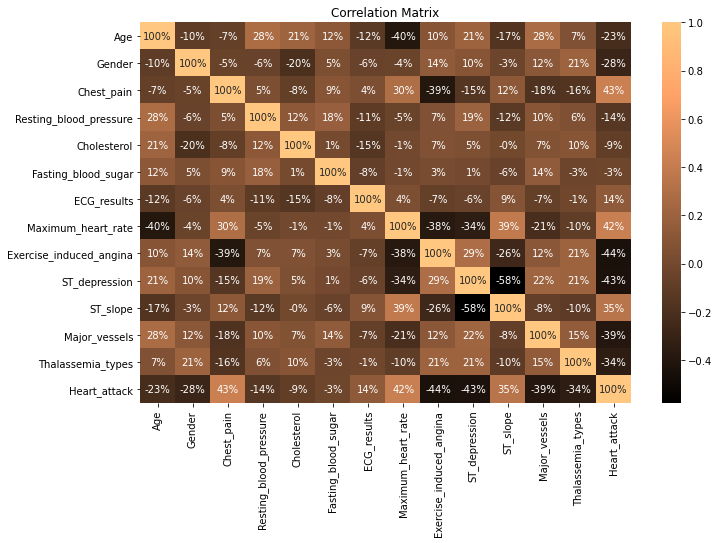

In [34]:
#corelation matrix with all Data
plt.figure(figsize=(11,7))
sns.heatmap(cbar=True,annot=True,fmt=".0%",data=data.corr(),cmap='copper')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

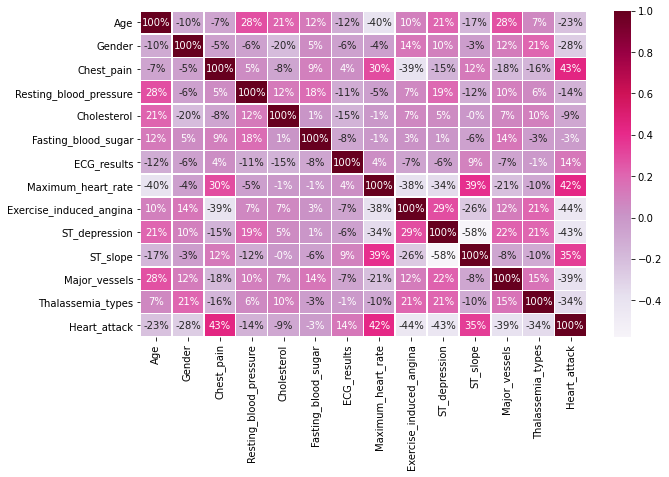

In [35]:
#corelation matrix with important Data
#data.drop(['Cholesterol' , 'Resting_blood_pressure', 'ECG_results' , 'Fasting_blood_sugar' , 'ST_slope']
  #       ,axis = 'columns' , inplace = True)
plt.figure(figsize=(10,6))
sns.heatmap(data.corr() , annot=True,fmt=".0%",linewidth=0.5, cmap='PuRd')#linewidth=0.5 is space between numbers

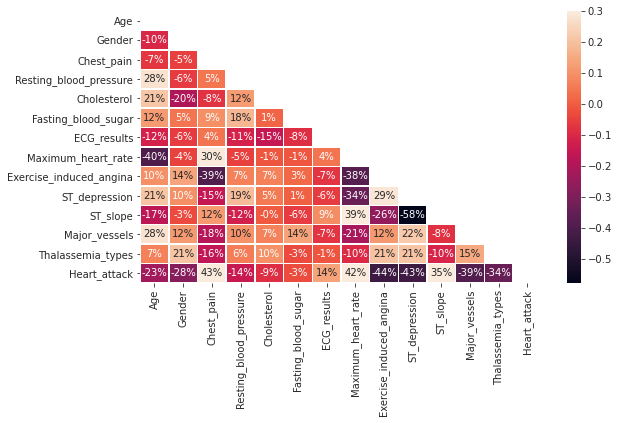

In [36]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(9, 5))
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False)
    #annot is numbers in squares
    #square=True the square is small but square=False the square is large

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

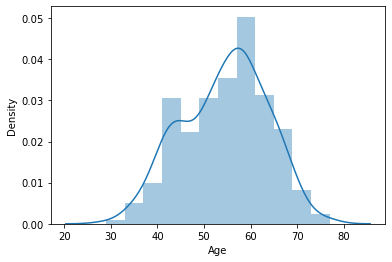

In [37]:
#Show histogram for Age 
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Gender', ylabel='Count'>

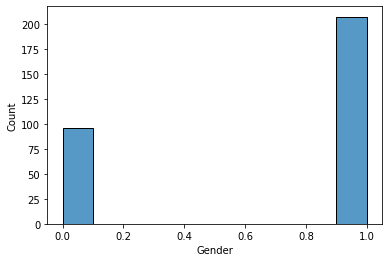

In [38]:
#Show histogram for Gender 
sns.histplot(data['Gender'])

<AxesSubplot:xlabel='Chest_pain', ylabel='Count'>

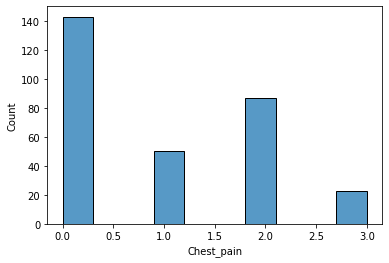

In [39]:
#Show histogram for Chest_pain
sns.histplot(data['Chest_pain'])

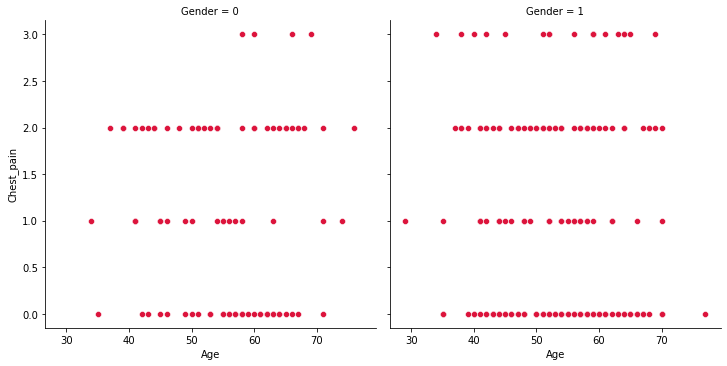

In [40]:
sns.relplot(x ='Age', y ='Chest_pain', col = 'Gender', data =data, color = 'crimson')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Maximum_heart_rate', ylabel='Density'>

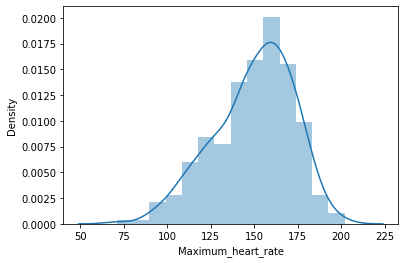

In [41]:
#Show histogram for Maximum_heart_rate
sns.distplot(data['Maximum_heart_rate'])

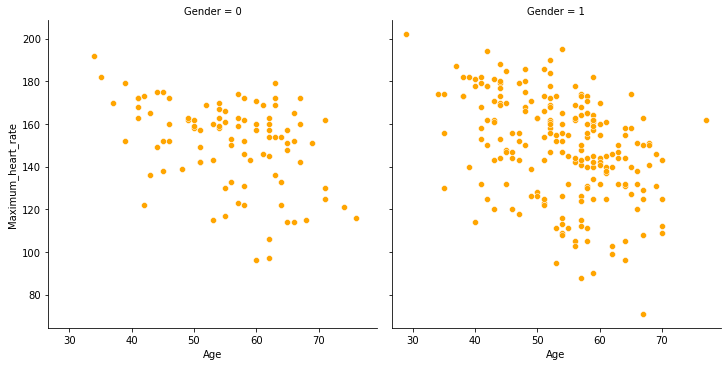

In [42]:
sns.relplot(x ='Age', y ='Maximum_heart_rate', col = 'Gender', data =data, color = 'orange')

<AxesSubplot:xlabel='Exercise_induced_angina', ylabel='Count'>

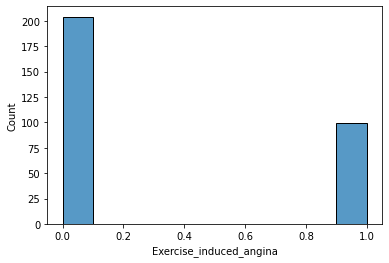

In [43]:
#Show histogram for Exercise_induced_angina
sns.histplot(data['Exercise_induced_angina'])

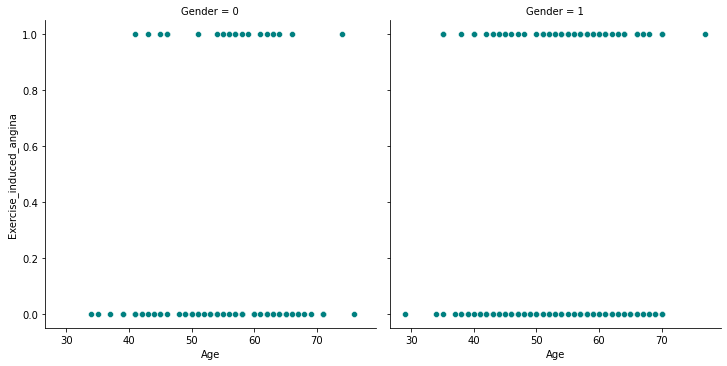

In [44]:
sns.relplot(x ='Age', y ='Exercise_induced_angina', col = 'Gender', data =data, color = 'teal')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST_depression', ylabel='Density'>

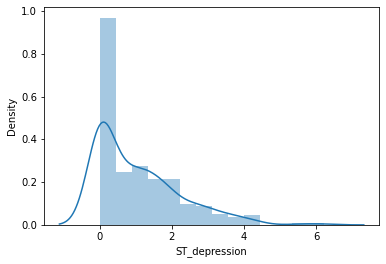

In [45]:
#Show histogram for ST_depression
sns.distplot(data['ST_depression'])

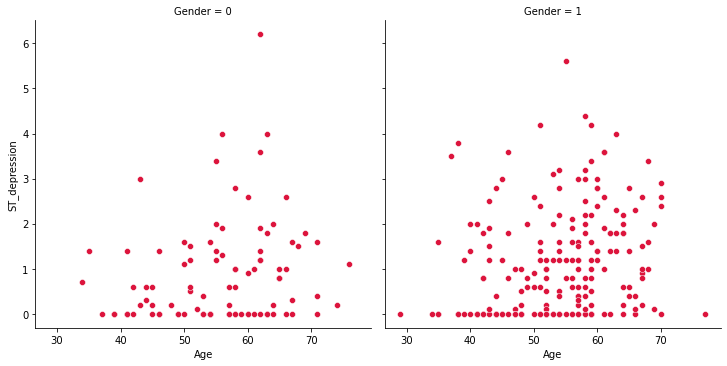

In [46]:
sns.relplot(x ='Age', y ='ST_depression', col = 'Gender', data =data, color = 'crimson')

<AxesSubplot:xlabel='Major_vessels', ylabel='Count'>

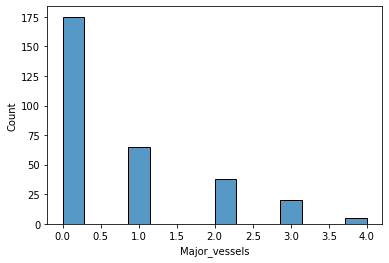

In [47]:
#Show histogram for Major_vessels
sns.histplot(data['Major_vessels'])

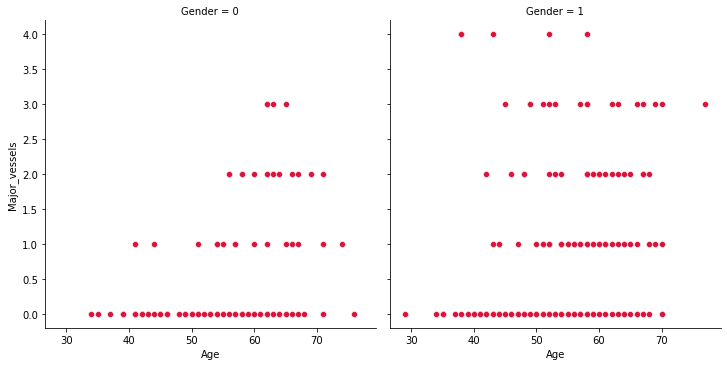

In [48]:
sns.relplot(x ='Age', y ='Major_vessels', col = 'Gender', data =data, color = 'crimson')

<AxesSubplot:xlabel='Thalassemia_types', ylabel='Count'>

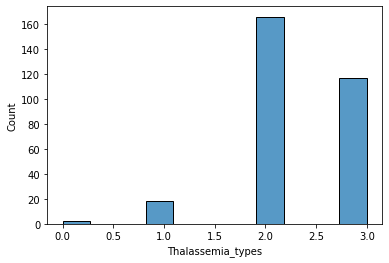

In [49]:
#Show histogram for Thalassemia_types
sns.histplot(data['Thalassemia_types'])

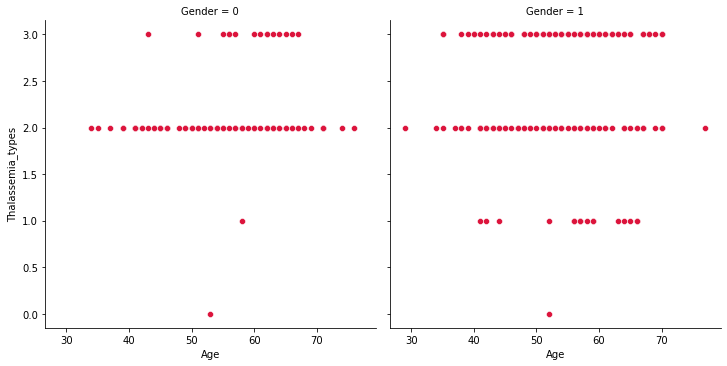

In [50]:
sns.relplot(x ='Age', y ='Thalassemia_types', col = 'Gender', data =data, color = 'crimson')

<AxesSubplot:xlabel='Heart_attack', ylabel='Count'>

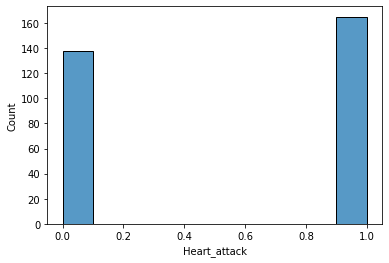

In [51]:
#Show histogram for Heart_attack
sns.histplot(data['Heart_attack'])

<AxesSubplot:xlabel='Heart_attack', ylabel='count'>

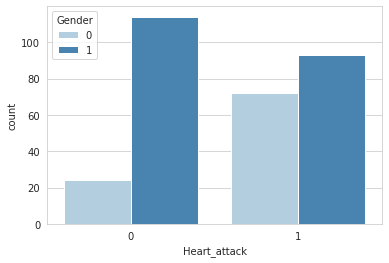

In [52]:
sns.set_style('whitegrid') #styling using sns
sns.countplot(x='Heart_attack',hue='Gender',data=data,palette='Blues') #palette is also styling parameter
#Insights from the graph are:
#females are highly suffering from heart disease as compared to males

In [53]:
data.columns

Index(['Age', 'Gender', 'Chest_pain', 'Resting_blood_pressure', 'Cholesterol',
       'Fasting_blood_sugar', 'ECG_results', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack'],
      dtype='object')

In [54]:
data.shape

(303, 14)

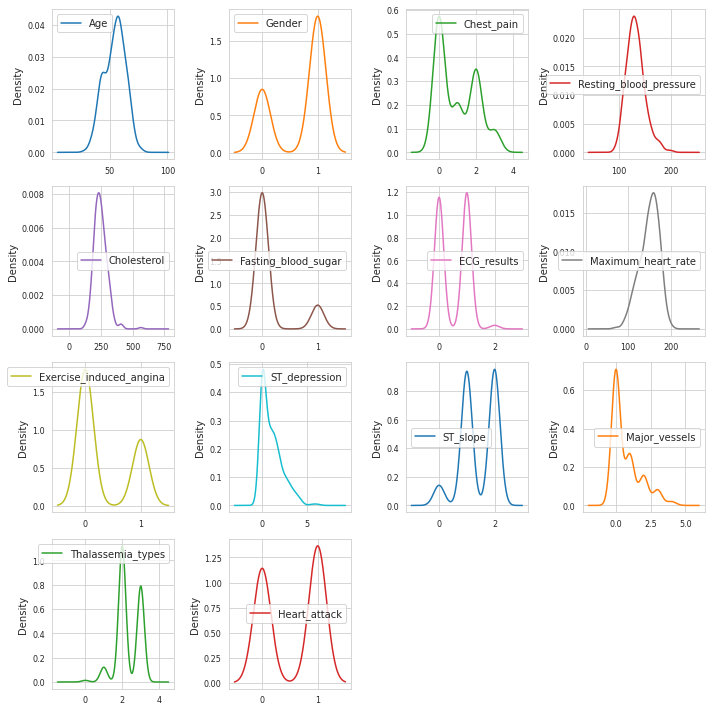

In [55]:
data.plot(kind='density' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


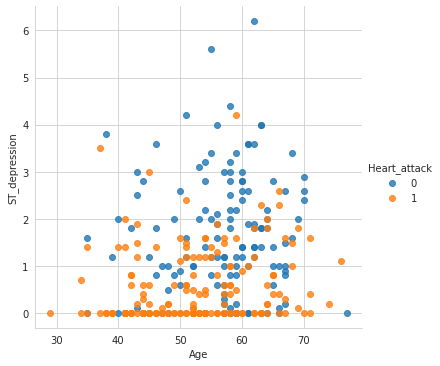

In [56]:
sns.lmplot('Age' , 'ST_depression' , data=data , hue='Heart_attack' , fit_reg=False , height=5)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


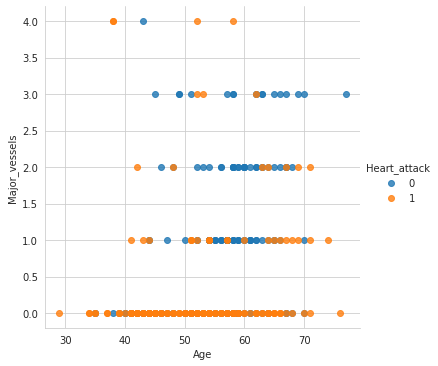

In [57]:
sns.lmplot('Age' , 'Major_vessels' , data=data , hue='Heart_attack' , fit_reg=False , height=5)
plt.show()

In [58]:
#sns.pairplot(data,size=5)

In [59]:
#data has correlation high with the target(Heart_attack)
data=data[['Age', 'Gender', 'Chest_pain', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack']]

In [60]:
data.columns

Index(['Age', 'Gender', 'Chest_pain', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack'],
      dtype='object')

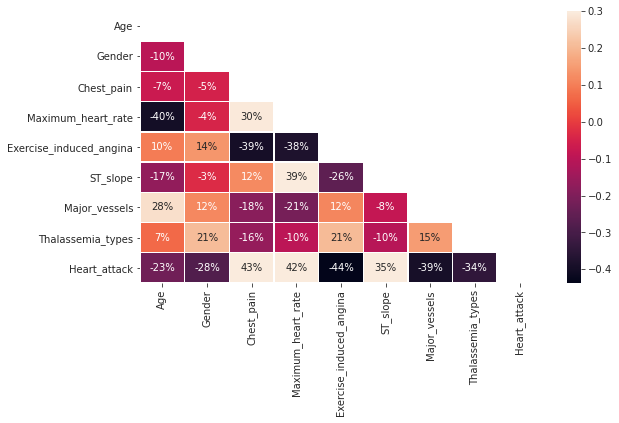

In [61]:
#show correlation
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(9, 5))
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False)
    #annot is numbers in squares
    #square=True the square is small but square=False the square is large

In [62]:
#show all statistics
data.describe(include='all')

,Age,Gender,Chest_pain,Maximum_heart_rate,Exercise_induced_angina,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,149.646865,0.326733,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,22.905161,0.469794,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,153.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,166.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [63]:
#important data
data

,Age,Gender,Chest_pain,Maximum_heart_rate,Exercise_induced_angina,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,150,0,0,0,1,1
1,37,1,2,187,0,0,0,2,1
2,41,0,1,172,0,2,0,2,1
3,56,1,1,178,0,2,0,2,1
4,57,0,0,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,1,0,3,0
299,45,1,3,132,0,1,0,3,0
300,68,1,0,141,0,1,2,3,0
301,57,1,0,115,1,1,1,3,0


<AxesSubplot:xlabel='Chest_pain'>

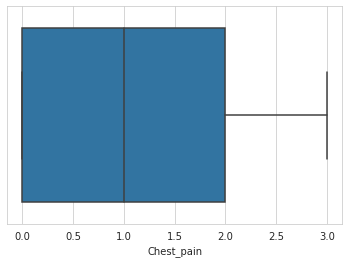

In [64]:
#show outliers
sns.boxplot(x=data['Chest_pain'])

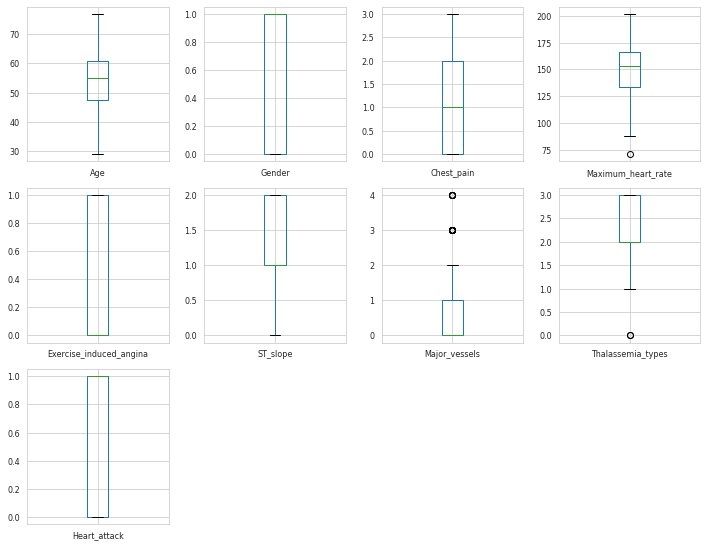

In [65]:
data.plot(kind='box' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()

In [73]:
data.columns
       '

Index(['Age', 'Gender', 'Chest_pain', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack'],
      dtype='object')

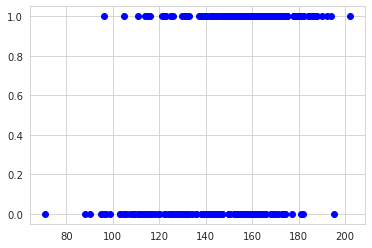

In [83]:
plt.scatter(data['Maximum_heart_rate'] , data['Heart_attack'] , color='blue')

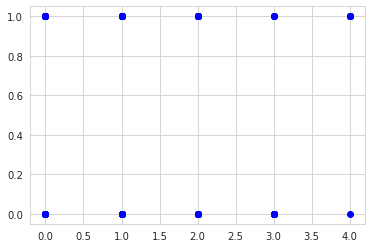

In [91]:
plt.scatter(data['Major_vessels'] , data['Heart_attack'] , color='blue')

In [80]:
data[data['Maximum_heart_rate']<75]

,Age,Gender,Chest_pain,Maximum_heart_rate,Exercise_induced_angina,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
272,67,1,0,71,0,1,0,2,0


In [95]:
data[data['Major_vessels']>=3.5]

,Age,Gender,Chest_pain,Maximum_heart_rate,Exercise_induced_angina,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
92,52,1,2,169,0,2,4,2,1
158,58,1,1,144,0,1,4,3,1
163,38,1,2,173,0,2,4,2,1
164,38,1,2,173,0,2,4,2,1
251,43,1,0,143,1,1,4,3,0


In [85]:
#print outliers
print('outliers' , data[(data['Maximum_heart_rate']<75)]['Maximum_heart_rate'].count())

outliers 1


In [104]:
#print outliers
print('outliers' , data[(data['Major_vessels']>=3)]['Major_vessels'].count())

outliers 25


In [132]:
#print outliers
print('outliers' , data[(data['Major_vessels']>=3.5)]['Major_vessels'].count())

outliers 5


In [133]:
#print outliers
print('outliers' , data[(data['Thalassemia_types']<=0)]['Thalassemia_types'].count())

outliers 2


In [134]:
data.shape

(303, 9)

In [135]:
#remove row outliers
clean_data= data[(data['Major_vessels']<=3.5) ]

In [136]:
clean_data.shape

(298, 9)

In [137]:
clean_data

,Age,Gender,Chest_pain,Maximum_heart_rate,Exercise_induced_angina,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,150,0,0,0,1,1
1,37,1,2,187,0,0,0,2,1
2,41,0,1,172,0,2,0,2,1
3,56,1,1,178,0,2,0,2,1
4,57,0,0,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,1,0,3,0
299,45,1,3,132,0,1,0,3,0
300,68,1,0,141,0,1,2,3,0
301,57,1,0,115,1,1,1,3,0


In [138]:
data.columns

Index(['Age', 'Gender', 'Chest_pain', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack'],
      dtype='object')

In [139]:
clean_data.columns

Index(['Age', 'Gender', 'Chest_pain', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack'],
      dtype='object')

In [140]:
#Spliting Data
import numpy as np
from sklearn.model_selection import train_test_split

In [142]:
X = clean_data.drop(['Heart_attack'] , axis=1).values

In [143]:
Y = clean_data['Heart_attack'].values

In [144]:
#split data 70% for train and 30% for test
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.03 ,random_state=40 )

In [145]:
x_train.shape

(289, 8)

In [153]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train , y_train)
y_pred = reg.predict(x_test)

In [156]:
#Training score
reg.score(x_train,y_train)

0.5089475649292499

In [157]:
#Training score
reg.score(x_test,y_test)

0.7818928765356215

This is OverFitting as Train score Higher than test score by 28%

In [158]:
#accuracy for Model
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred)
r2

0.7818928765356215

In [67]:
#to download and save data 
#data.to_csv("data_name.csv",header=True,index=True,encoding="utf-8")